Banana


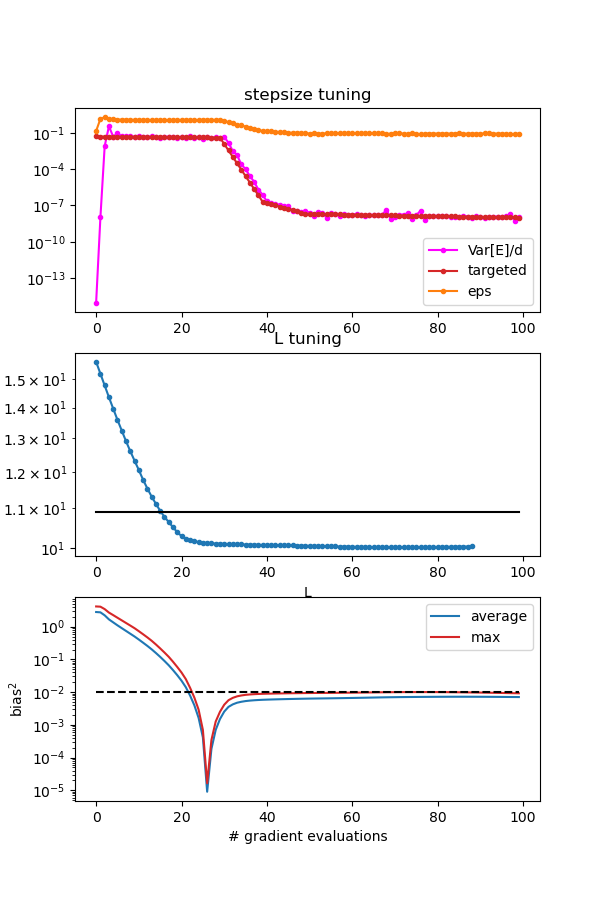

ICG


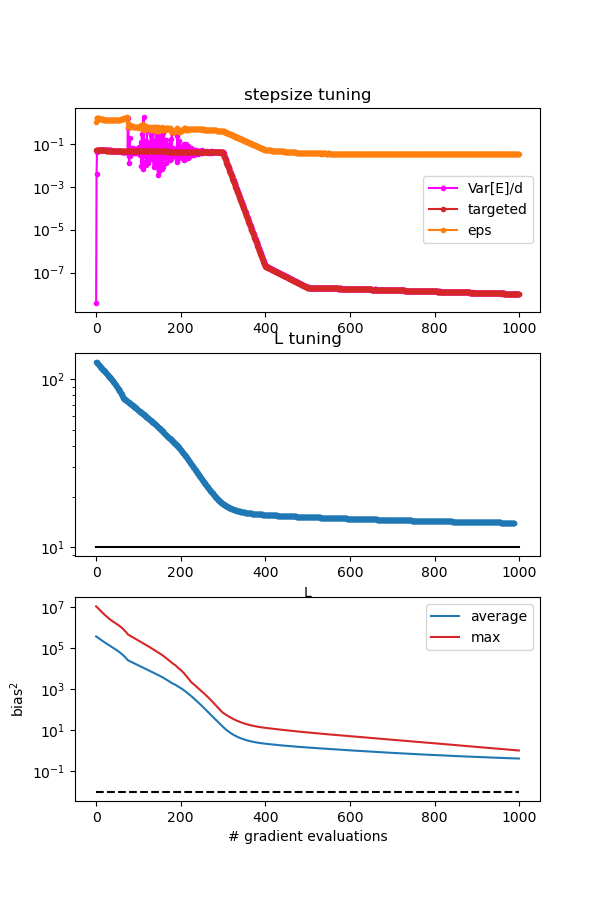

brownian


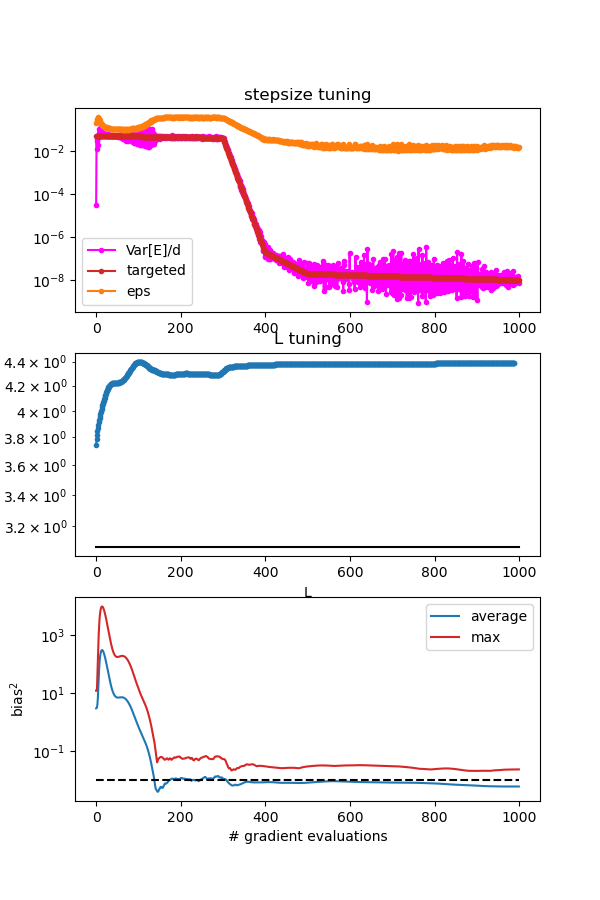

IRT


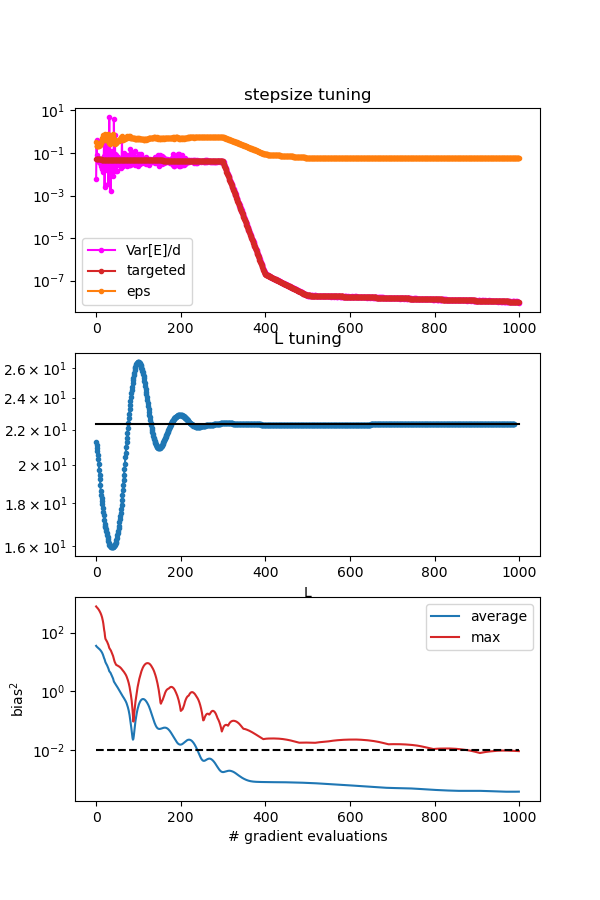

SV


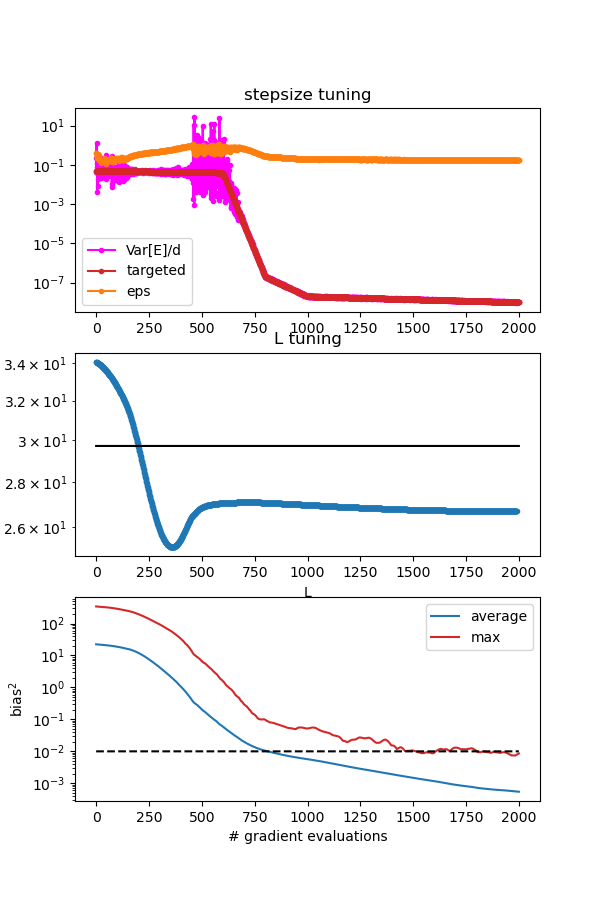

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display


targets = ['Banana', 'ICG', 'german_credit', 'brownian', 'IRT', 'SV']

for i in [0, 1, 3, 4, 5]:
    name = targets[i]
    print(name)
    display(Image(filename='plots/tst_ensemble/'+name+'.png'))
    #ICG, Brownian, SV

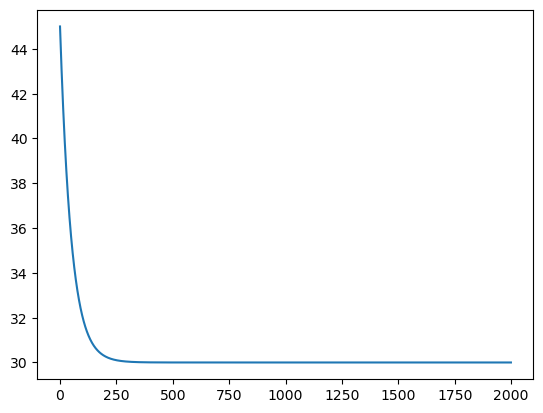

In [18]:
num = 2000
steps = np.arange(num)

plt.plot(steps, 30. * (1 + 0.5 * np.exp(- 40. * steps / num)))